In [47]:
import pandas as pd
from datetime import datetime as dt
import plotly.express as px

In [10]:
df = pd.read_excel(r'../streamlit-dashbord/supermarkt_sales.xlsx', header=3, usecols="B:R")
df.sample(3)

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,2021-03-29,19:12:00,Ewallet,823.40,4.761905,41.1700,4.3
779,457-94-0464,B,Mandalay,Member,Male,Electronic accessories,87.87,9,39.5415,830.3715,2021-01-31,20:32:00,Ewallet,790.83,4.761905,39.5415,5.6
77,381-20-0914,A,Yangon,Member,Female,Fashion accessories,20.01,9,9.0045,189.0945,2021-01-12,15:48:00,Credit card,180.09,4.761905,9.0045,5.7


# Convert/Add Hour Column

In [49]:
df['hour']=pd.to_datetime(df['Time'], format="%H:%M:%S").dt.hour
df['hour'].astype(int)

Invoice ID                         object
Branch                             object
City                               object
Customer_type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
hour                                int32
dtype: object

In [52]:
sales_by_hour = df.groupby(by=['hour'])[['Total']].sum()
sales_by_hour

,Total
hour,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990
15,31179.5085
16,25226.3235
17,24445.2180
18,26030.3400


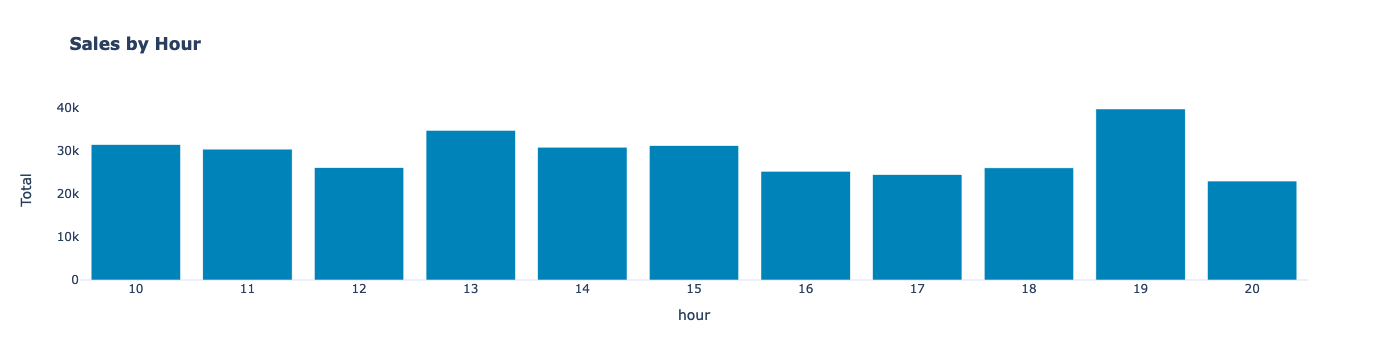

In [63]:
fig_hourly_sales = px.bar(
    sales_by_hour,
    x=sales_by_hour.index,
    y='Total',
    title="<b>Sales by Hour</b>",
    color_discrete_sequence=['#0083B8']*len(sales_by_hour),
    template="plotly_white"
)
fig_hourly_sales.update_layout(
    xaxis=dict(tickmode='linear'),
    plot_bgcolor="rgba(0,0,0,0)",
    yaxis=(dict(showgrid=False))
)
fig_hourly_sales

In [ ]:
df.info()

# Sales by Product 📊

In [16]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer_type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [17]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [19]:
df.groupby("Product line")[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income','Rating']].sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1


In [22]:
df.groupby(by=['Product line'])[['Total']].sum()

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [24]:
df.groupby(by=['Product line'])[['Total']].sum().sort_values(by="Total", ascending=False)

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390
